In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

#base_dir = '/Users/lukechang/Dropbox/MIND_OpenBeacon/'
base_dir = '/Users/jaeyoungson/Dropbox (Brown)/MIND_OpenBeacon/'
data_dir = base_dir + 'Data'

In [2]:
def json2df(file_path):
    file_object = open(file_path, 'r')
    data = [json.loads(x) for x in file_object]
    data = json_normalize(data)
    return data

In [3]:
file_paths = [f for f in glob.glob(os.path.join(data_dir, "*.csv"))]
data = pd.DataFrame()

for x in file_paths:
    data = data.append(json2df(x))

data = data.reset_index(drop=True)

data.head()

,angle,group,rssi,tag_me,tag_them,time_local_s,time_remote_s
0,90,1,-83,0x4971A32A,0x0B3054C1,52,4
1,90,1,-87,0x4971A32A,0x0B3054C1,54,6
2,90,1,-80,0x4971A32A,0x0B3054C1,74,26
3,90,1,-81,0x4971A32A,0x0B3054C1,120,72
4,90,1,-82,0x4971A32A,0x0B3054C1,128,80


In [4]:
# Reorder columns
data = data[['tag_me', 'tag_them', 'time_local_s', 'time_remote_s', 'rssi', 'angle', 'group']]

# Recode RSSI so that greater pos = greater signal strength
data['rssi_recoded'] = data.loc[:, 'rssi'] - min(data.loc[:, 'rssi'])

data.head()

,tag_me,tag_them,time_local_s,time_remote_s,rssi,angle,group,rssi_recoded
0,0x4971A32A,0x0B3054C1,52,4,-83,90,1,6
1,0x4971A32A,0x0B3054C1,54,6,-87,90,1,2
2,0x4971A32A,0x0B3054C1,74,26,-80,90,1,9
3,0x4971A32A,0x0B3054C1,120,72,-81,90,1,8
4,0x4971A32A,0x0B3054C1,128,80,-82,90,1,7


In [53]:
# Export to csv
pd.DataFrame.to_csv(data, data_dir+"/mind_openbeacon_long.csv")

In [5]:
# honestly, it's gonna be a giant pain to get the timestamps aligned...
# let's just start off trying to create some network visualizations

import igraph as ig
print(ig.__version__)

0.7.1


In [22]:
edgelist = []
weights = []

for i in data.index:
    edge = (data.loc[i, 'tag_me'], data.loc[i, 'tag_them'])
    if edge not in edgelist:
        edgelist.append(edge)
        weights.append(1)
    else:
        weights[edgelist.index(edge)] += 1

NameError: name 'Graph' is not defined

In [31]:
node_list = data.loc[:, 'tag_me'].append(data.loc[:, 'tag_them']).unique()

In [34]:
g = ig.Graph()
g.add_vertices(len(node_list))
g.vs['name'] = node_list
g.add_edges(edgelist)
g.es['weight'] = weights

In [51]:
g.es["weight"]

[10056,
 1930,
 1556,
 158,
 3369,
 1045,
 1775,
 2172,
 134,
 1627,
 5541,
 633,
 1874,
 1435,
 183,
 1866,
 845,
 7871,
 356,
 25,
 529,
 830,
 1018,
 189,
 1572,
 431,
 3712,
 2031,
 1208,
 1174,
 5659,
 636,
 1344,
 351,
 80,
 489,
 9,
 90,
 391,
 463,
 708,
 30,
 28,
 1,
 450,
 850,
 1295,
 235,
 838,
 150,
 921,
 156,
 380,
 975,
 57,
 262,
 3888,
 1,
 4,
 975,
 34328,
 185,
 354,
 189,
 303,
 2601,
 986,
 266,
 3618,
 5350,
 1202,
 31,
 1400,
 1498,
 646,
 814,
 1507,
 2,
 117,
 119,
 569,
 3,
 119,
 2135,
 774,
 229,
 638,
 2,
 100,
 1263,
 5840,
 182,
 472,
 2279,
 3222,
 751,
 1063,
 1142,
 414,
 217,
 3364,
 7103,
 3337,
 4788,
 2873,
 1466,
 2220,
 6901,
 3090,
 1730,
 2858,
 646,
 8802,
 825,
 129,
 11,
 1550,
 545,
 5385,
 370,
 149,
 1329,
 3493,
 4234,
 7155,
 1556,
 1157,
 550,
 171,
 1383,
 3048,
 3457,
 2856,
 1301,
 4125,
 1813,
 3034,
 923,
 10,
 896,
 953,
 589,
 634,
 169,
 152,
 10915,
 315,
 6,
 1155,
 5,
 7113,
 1916,
 1,
 1,
 114,
 1701,
 4241,
 956,
 3307,
 

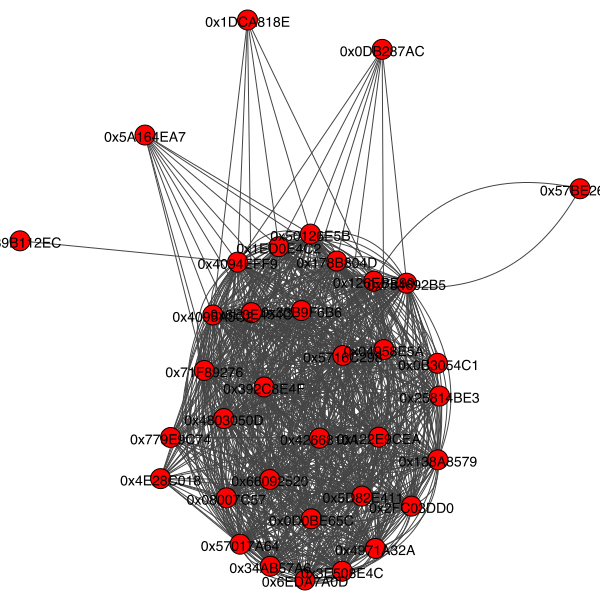

In [50]:
visual_style = {}
visual_style["vertex_size"] = 5
#visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
#visual_style["edge_width"] = g.es["weight"]
#visual_style["layout"] = g.layout("fr")
visual_style["bbox"] = (500, 500)
visual_style["margin"] = 20
#ig.plot(g, **visual_style)
ig.plot(g)

In [21]:
i = 0
edge = (data.loc[i, 'tag_me'], data.loc[i, 'tag_them'])
edge



('0x4971A32A', '0x0B3054C1')

In [16]:
data.loc[0, ['tag_me', 'tag_them']]

,tag_me,tag_them
0,0x4971A32A,0x0B3054C1
0,0x784692B5,0x33B9F6B6
0,0x08007C57,0x4971A32A
0,0x5716C298,0x0B3054C1
0,0x4094EFF9,0x39B112EC
0,0x126EBE99,0x57BE2613
0,0x3E508E4C,0x138A8579
0,0x0D0BE65C,0x6EDA7A0D
0,0x04958E5A,0x392C8E4F
0,0x50126E5B,0x4803050D


In [20]:
data.loc[0]

tag_me           0x4971A32A
tag_them         0x0B3054C1
time_local_s             52
time_remote_s             4
rssi                    -83
angle                    90
group                     1
rssi_recoded              6
Name: 0, dtype: object

In [19]:
data = data.reset_index(drop=True)
data.head()

,tag_me,tag_them,time_local_s,time_remote_s,rssi,angle,group,rssi_recoded
0,0x4971A32A,0x0B3054C1,52,4,-83,90,1,6
1,0x4971A32A,0x0B3054C1,54,6,-87,90,1,2
2,0x4971A32A,0x0B3054C1,74,26,-80,90,1,9
3,0x4971A32A,0x0B3054C1,120,72,-81,90,1,8
4,0x4971A32A,0x0B3054C1,128,80,-82,90,1,7
